In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_yaw_data(x_pts, y_pts):
    yaws = np.zeros(x_pts.shape[0])
    for i in range(0, x_pts.shape[0]-1):
        yaws[i] = np.arctan2( (y_pts[i+1] - y_pts[i]), (x_pts[i+1] - x_pts[i]) )
    return yaws 

def plot_waypoints2D(x_pts, y_pts, yaw_pts, arrow_size=0.1, scale_follows_x=True):
    print('Trajectory Point Size: %d' % x_pts.shape[0])
    dx_pts = arrow_size * np.cos(yaw_pts)
    dy_pts = arrow_size * np.sin(yaw_pts)
    ax = plt.axes()
    ax.plot(x_pts, y_pts, marker='x')
    # angles 'xy' : ‘xy’: arrows point from (x,y) to (x+u, y+v). 
    # Use this for plotting a gradient field.
    ax.quiver(x_pts, y_pts, dx_pts, dy_pts, angles='xy')
    # Find X max, Y max to get proper plotting ratio (prevent scale confusion)
    x_max, x_min = np.max(x_pts), np.min(x_pts)
    y_max, y_min = np.max(y_pts), np.min(y_pts)
    
    if scale_follows_x:
        tmp = x_max - x_min
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(-tmp/2., +tmp/2.)
    else:
        tmp = y_max - y_min
        ax.set_xlim(-tmp/2., +tmp/2.)
        ax.set_ylim(y_min, y_max)
    plt.plot()
    

In [3]:
#def plot_waypoints(x_pts, y_pts):
#    plt.plot(x_pts, y_pts)

# Control at 4 Hz
initial_x = 3.0
dist_x = 10.0
x_pts = np.arange(0.0, dist_x, 1./4., np.float32) + initial_x
y_pts = 1.0 * np.sin(2.0 * np.pi * 0.2 * x_pts  ) 

z_pts = np.ones((x_pts.shape[0])) * 10.0
yaw_pts = generate_yaw_data(x_pts, y_pts)

Trajectory Point Size: 40


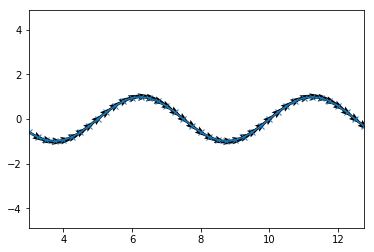

In [4]:
plot_waypoints2D(x_pts, y_pts, yaw_pts)

In [7]:
waypoints_data = np.stack(( x_pts, y_pts, z_pts, yaw_pts), 1 )
np.savetxt('waypoints.csv', waypoints_data, delimiter=',')

In [ ]:
def generate_path_pose(x_pts, y_pts, z_pts):
    rpy_poses = np.zeros( (x_pts.shape[0], 3) )
    for i in range(0, x_pts.shape[0]-1):
        #rpy_poses[i,0] = np.arctan2( (y_pts[i+1] - y_pts[i]), (x_pts[i+1] - x_pts[i]) ) #roll
        #rpy_poses[i,1] = np.arctan2( (y_pts[i+1] - y_pts[i]), (x_pts[i+1] - x_pts[i]) ) #pitch
        rpy_poses[i,2] = np.arctan2( (y_pts[i+1] - y_pts[i]), (x_pts[i+1] - x_pts[i]) ) #yaw
        
    